In [4]:
import tensorflow as tf
import numpy as np

/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
np.random.seed(101)
tf.set_random_seed(101)

In [6]:
# Let's create some random variables
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [7]:
# Let's create some PlaceHolders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [8]:
# Let's create some operations
add_op = a+b
mul_op = a*b

In [9]:
# Let's create some session to execute these operations into the session

In [10]:
with tf.Session() as sess:
   add_results = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
   print(add_results) 

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]


In [11]:
with tf.Session() as sess:
    result = sess.run(mul_op, feed_dict={a:rand_a, b:rand_b})
    print (result)

[[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


In [12]:
# Neural Network

In [13]:
n_features = 10
n_dense_neurons = 3

In [14]:
x = tf.placeholder(tf.float32, (None, n_features))

In [15]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.random_normal([n_dense_neurons]))

In [16]:
xw = tf.matmul(x,w)

In [17]:
z = tf.add(xw,b)

In [18]:
a = tf.sigmoid(z)

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x:np.random.random([1, n_features])})

In [21]:

print(layer_out)

[[ 0.02430857  0.88332778  0.06276809]]


# Now let's adjust our variables i.e. W and b.

In [22]:
# Lets add some data along with some noise

In [23]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [24]:
print(x_data)

[-1.20856056 -0.08034641  2.82674411  4.50477294  3.42312535  4.88227319
  7.18414126  6.77068715  9.4930023   9.96290567]


In [25]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5, 10)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

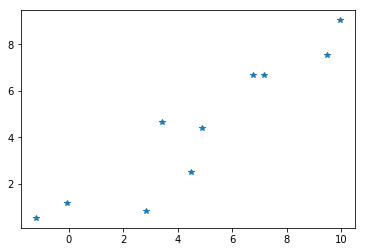

In [27]:
plt.plot(x_data,y_label, '*') #'*' to visualize only the points

In [28]:
#y = mx+b
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [29]:
#assigning the random weights to the variable
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [30]:
#
error =0
for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

# optimizer to lower the error

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [33]:
#initialize the variable before using it in session
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 1000
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

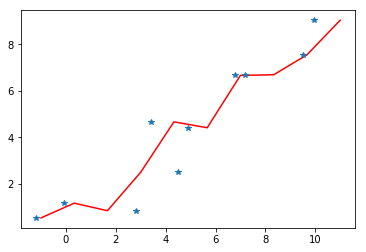

In [35]:
x_test = np.linspace(-1,11,10)
#y = mx+b
y_pred_plot = final_slope*x_test+final_intercept
plt.plot(x_test,y_label, color ='red')
plt.plot(x_data,y_label,'*')